In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 에르되시-레니 모델
### 2가지 병형 모델
1. G(n,p)

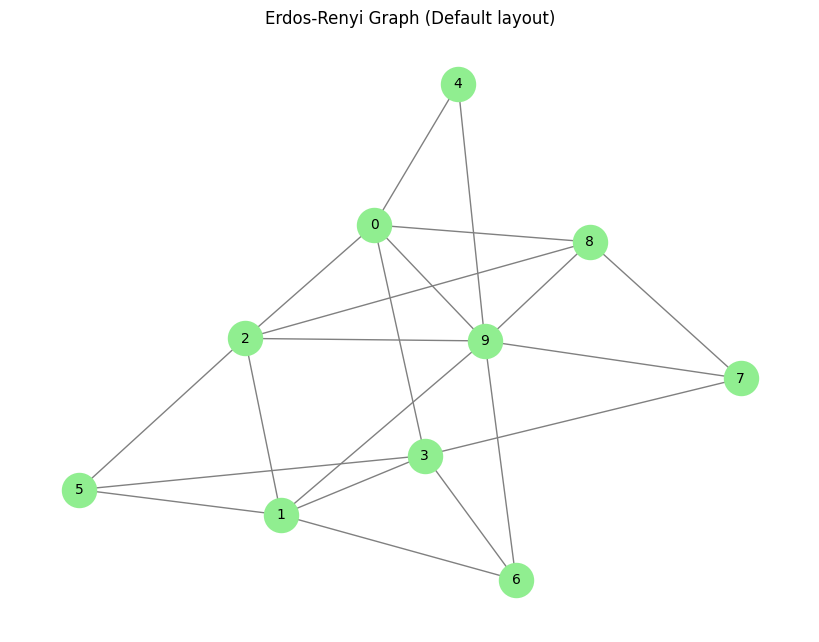

In [6]:
#노드=10, p=0.5
G=nx.erdos_renyi_graph(10,0.5,seed=42)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=600, font_size=10)
plt.title("Erdos-Renyi Graph (Default layout)")
plt.show()

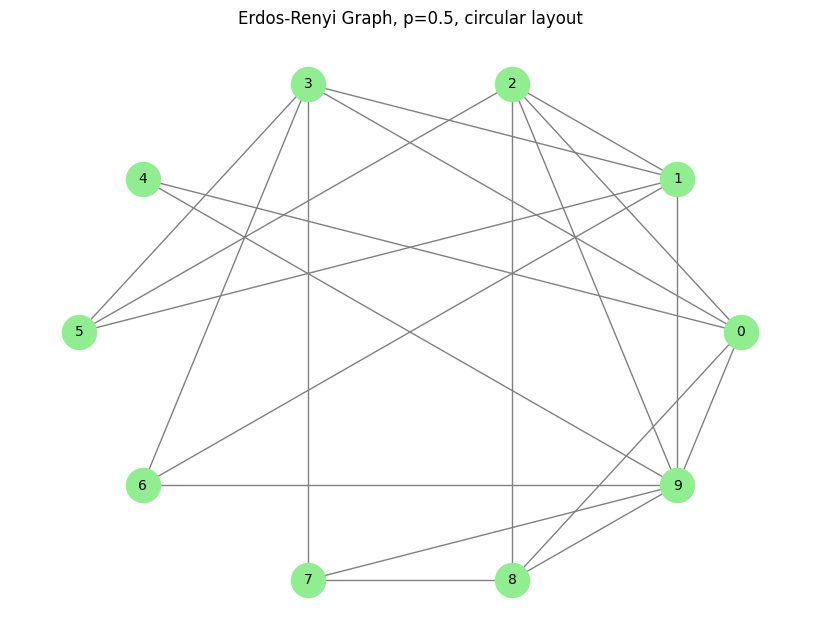

In [14]:
#circular_layout은 그래프를 원형으로 배치
pos=nx.circular_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G,pos=pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=600, font_size=10)
plt.title("Erdos-Renyi Graph, p=0.5, circular layout")
plt.show()

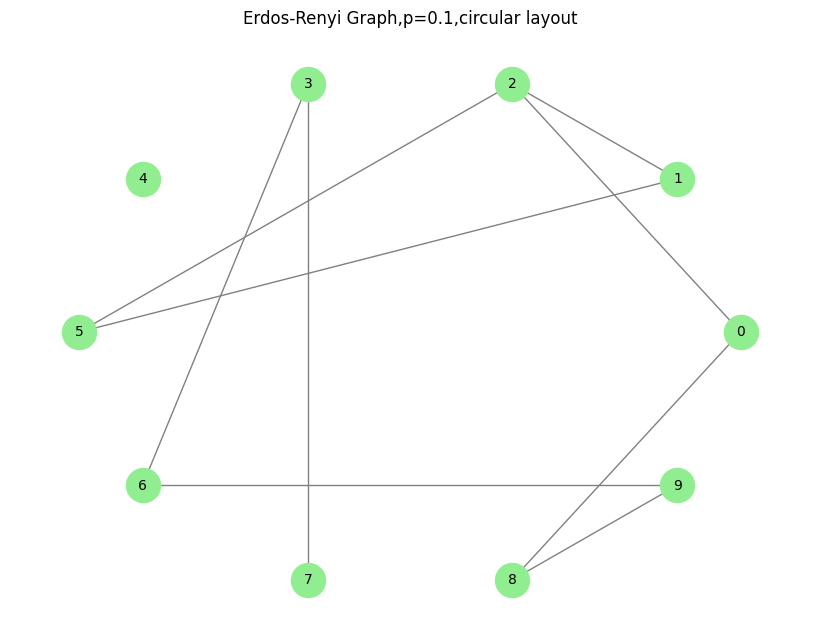

In [ ]:
#p=0.1
G_01=nx.erdos_renyi_graph(10,0.1,seed=42)
pos=nx.circular_layout(G_01)
plt.figure(figsize=(8, 6))
nx.draw(G_01,pos=pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=600, font_size=10)
plt.title("Erdos-Renyi Graph,p=0.1,circular layout")
plt.show()

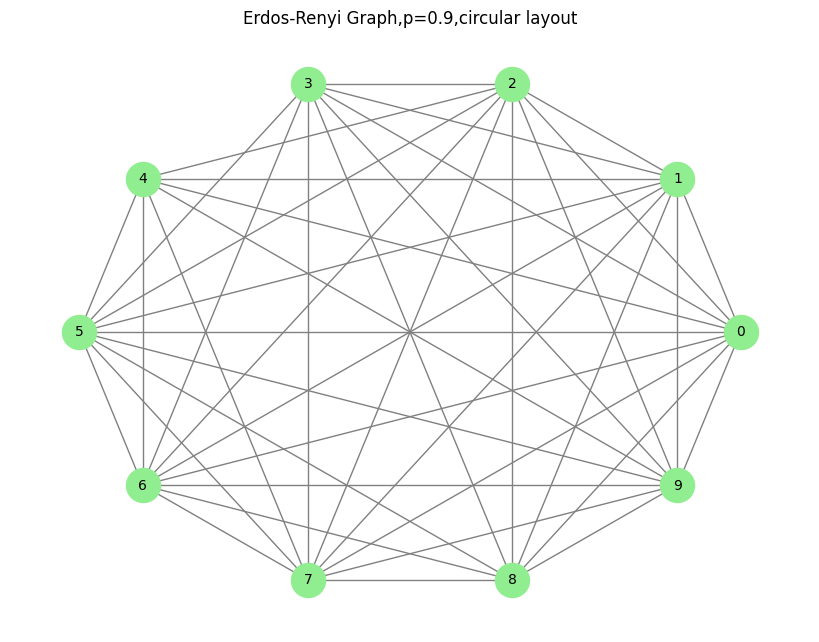

In [ ]:
#p=0.9
G_09=nx.erdos_renyi_graph(10,0.9,seed=42)
pos=nx.circular_layout(G_09)
plt.figure(figsize=(8, 6))
nx.draw(G_09,pos=pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=600, font_size=10)
plt.title("Erdos-Renyi Graph,p=0.9,circular layout")
plt.show()

2. G(n,M)

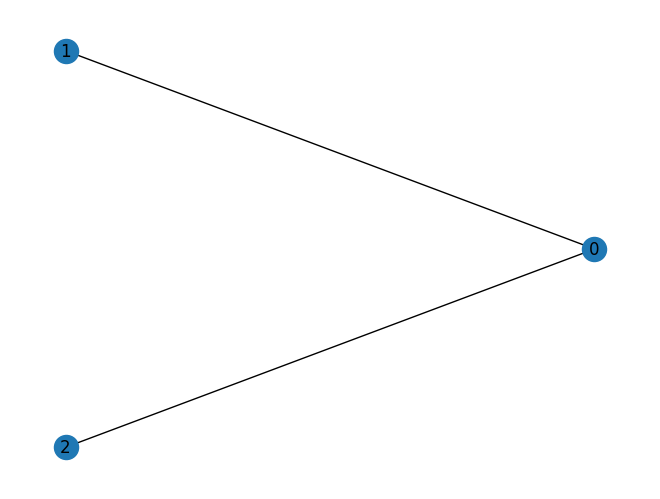

In [17]:
G_M=nx.gnm_random_graph(3,2,seed=42)
pos=nx.circular_layout(G_M)
nx.draw(G_M,pos=pos,with_labels=True)


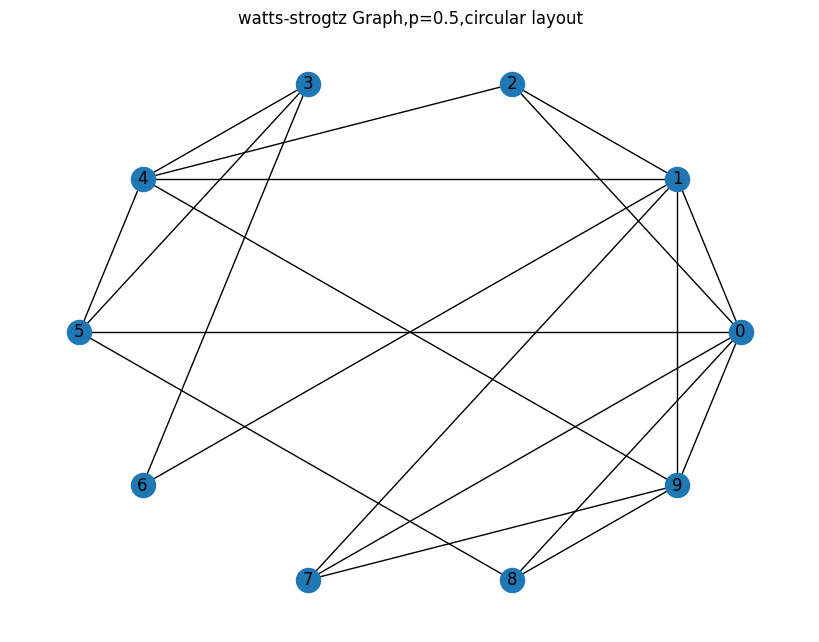

In [22]:
#watts-strogtz
G=nx.watts_strogatz_graph(10,4,0.5,seed=42)
pos=nx.circular_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G,pos=pos,with_labels=True)
plt.title("watts-strogtz Graph,p=0.5,circular layout")
plt.show()

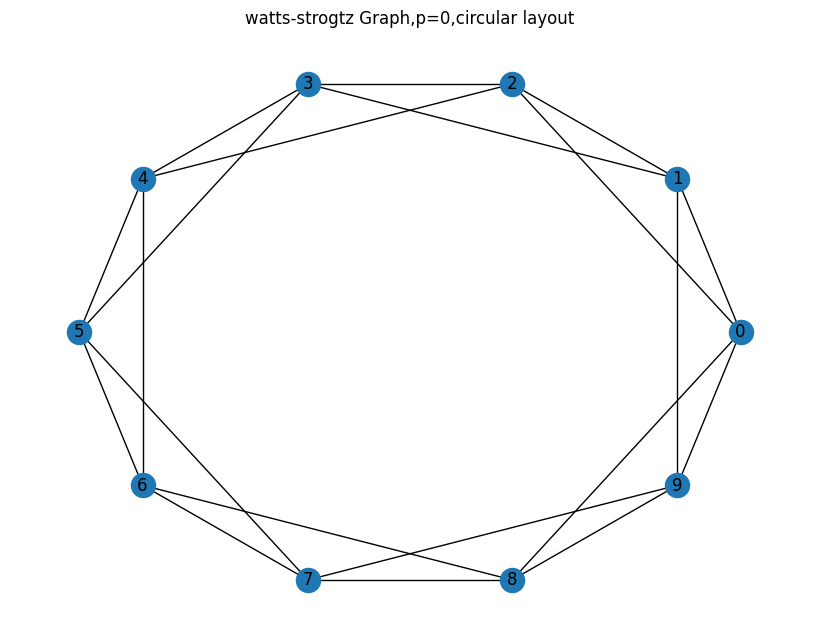

In [23]:
#watts-strogtz
G=nx.watts_strogatz_graph(10,4,0,seed=42)
pos=nx.circular_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G,pos=pos,with_labels=True)
plt.title("watts-strogtz Graph,p=0,circular layout")
plt.show()

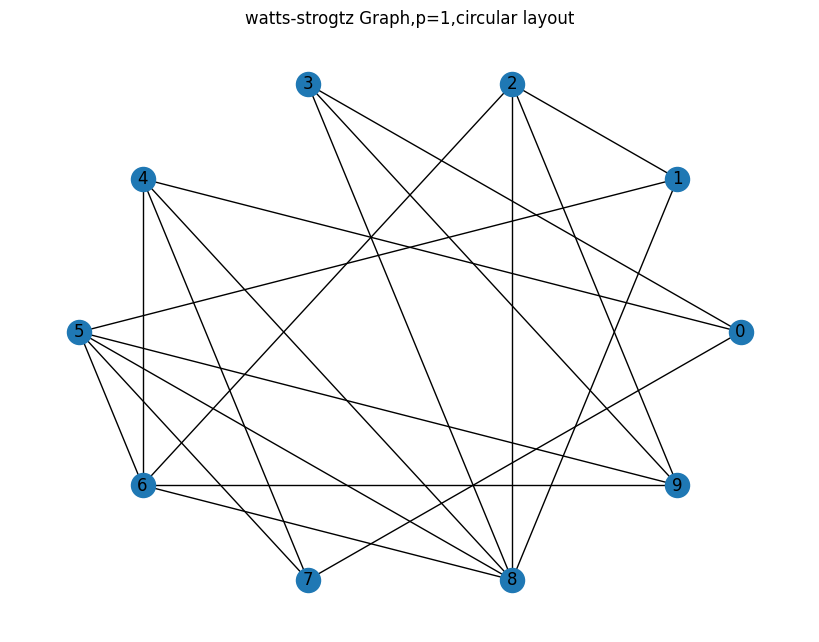

In [24]:
#watts-strogtz
G=nx.watts_strogatz_graph(10,4,1,seed=42)
pos=nx.circular_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G,pos=pos,with_labels=True)
plt.title("watts-strogtz Graph,p=1,circular layout")
plt.show()

### VGAE

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import VGAE, GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import train_test_split_edges

# 1. 데이터셋 불러오기 (Cora)
dataset = Planetoid(root='E:/glass_git/ML-DL/Graph/data', name='Cora')
data = dataset[0]

# 2. edge 예측을 위해 train/val/test split
data = train_test_split_edges(data)

# 3. 인코더 정의
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels)
        self.conv_mu = GCNConv(2 * out_channels, out_channels)
        self.conv_logstd = GCNConv(2 * out_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

# 4. VGAE 모델 생성
out_channels = 16
model = VGAE(GCNEncoder(dataset.num_features, out_channels))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
beta = 0.01  # KL loss 가중치 줄이기

# 5. 학습 함수
def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(data.x, data.train_pos_edge_index)
    recon_loss = model.recon_loss(z, data.train_pos_edge_index)
    kl_loss = model.kl_loss() / data.num_nodes
    loss = recon_loss + beta * kl_loss
    loss.backward()
    optimizer.step()
    return loss.item()

# 6. 테스트 함수
def test():
    model.eval()
    with torch.no_grad():
        z = model.encode(data.x, data.train_pos_edge_index)
    auc, ap = model.test(z, data.test_pos_edge_index, data.test_neg_edge_index)
    return auc, ap

# 7. 학습 루프
for epoch in range(1, 101):
    loss = train()
    auc, ap = test()
    print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, AUC: {auc:.4f}, AP: {ap:.4f}')


c:\Users\hyr69\anaconda3\envs\graph\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 001, Loss: 3.5040, AUC: 0.7090, AP: 0.7329
Epoch 002, Loss: 2.8995, AUC: 0.6962, AP: 0.7202
Epoch 003, Loss: 2.4346, AUC: 0.6970, AP: 0.7232
Epoch 004, Loss: 2.0016, AUC: 0.7075, AP: 0.7366
Epoch 005, Loss: 1.7345, AUC: 0.7283, AP: 0.7559
Epoch 006, Loss: 1.5438, AUC: 0.7755, AP: 0.7891
Epoch 007, Loss: 1.3999, AUC: 0.8000, AP: 0.7931
Epoch 008, Loss: 1.3299, AUC: 0.7863, AP: 0.7750
Epoch 009, Loss: 1.2759, AUC: 0.7899, AP: 0.7777
Epoch 010, Loss: 1.2549, AUC: 0.8081, AP: 0.7918
Epoch 011, Loss: 1.2146, AUC: 0.8030, AP: 0.7825
Epoch 012, Loss: 1.1701, AUC: 0.7946, AP: 0.7824
Epoch 013, Loss: 1.1450, AUC: 0.7899, AP: 0.7812
Epoch 014, Loss: 1.1352, AUC: 0.8004, AP: 0.7849
Epoch 015, Loss: 1.1143, AUC: 0.8059, AP: 0.7869
Epoch 016, Loss: 1.1345, AUC: 0.8068, AP: 0.7953
Epoch 017, Loss: 1.1249, AUC: 0.8125, AP: 0.8006
Epoch 018, Loss: 1.0965, AUC: 0.8202, AP: 0.8048
Epoch 019, Loss: 1.0663, AUC: 0.8238, AP: 0.8144
Epoch 020, Loss: 1.0329, AUC: 0.8252, AP: 0.8235
Epoch 021, Loss: 1.0

### GraphVAE

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import train_test_split_edges, negative_sampling
from sklearn.metrics import roc_auc_score, average_precision_score

# 1. 데이터셋 불러오기
dataset = Planetoid(root='E:/glass_git/ML-DL/Graph/data', name='Cora')
data = dataset[0]
data = train_test_split_edges(data)

# 2. GraphVAE 인코더 정의
class GraphVAE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphVAE, self).__init__()
        self.gc1 = GCNConv(in_channels, hidden_channels)
        self.gc_mu = GCNConv(hidden_channels, out_channels)
        self.gc_logstd = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        h = F.relu(self.gc1(x, edge_index))
        mu = self.gc_mu(h, edge_index) # mean layer
        logstd = self.gc_logstd(h, edge_index) # std layer
        std = torch.exp(logstd)
        eps = torch.randn_like(std) # weights
        z = mu + eps * std  # reparameterization trick
        return z, mu, logstd

    def decode(self, z, edge_index):
        # 특정 edge 쌍만 예측
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=-1)
        return logits

    def recon_loss(self, z, pos_edge_index):
        pos_loss = -torch.log(torch.sigmoid(self.decode(z, pos_edge_index)) + 1e-15).mean()
        neg_edge_index = negative_sampling(
            edge_index=pos_edge_index,
            num_nodes=z.size(0),
            num_neg_samples=pos_edge_index.size(1)
        )
        neg_loss = -torch.log(1 - torch.sigmoid(self.decode(z, neg_edge_index)) + 1e-15).mean()
        return pos_loss + neg_loss

    def kl_loss(self, mu, logstd): 
        '''   
         prior 분포는 항상 (0, 1)로 고정, mu와 logstd는 posterior 분포
        '''
        return -0.5 * torch.mean(1 + 2 * logstd - mu**2 - torch.exp(2 * logstd))

# 3. 모델 생성
in_channels = dataset.num_features
hidden_channels = 32
out_channels = 16
model = GraphVAE(in_channels, hidden_channels, out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
beta = 0.01

# 4. 학습 함수
def train():
    model.train()
    optimizer.zero_grad()
    z, mu, logstd = model.encode(data.x, data.train_pos_edge_index)
    loss = model.recon_loss(z, data.train_pos_edge_index) + beta * model.kl_loss(mu, logstd)
    loss.backward()
    optimizer.step()
    return loss.item()

# 5. 테스트 함수
@torch.no_grad()
def test():
    model.eval()
    z, mu, logstd = model.encode(data.x, data.train_pos_edge_index)
    pos_y = torch.ones(data.test_pos_edge_index.size(1))
    neg_y = torch.zeros(data.test_neg_edge_index.size(1))
    y = torch.cat([pos_y, neg_y], dim=0)

    pos_pred = model.decode(z, data.test_pos_edge_index).sigmoid()
    neg_pred = model.decode(z, data.test_neg_edge_index).sigmoid()
    pred = torch.cat([pos_pred, neg_pred], dim=0)

    auc = roc_auc_score(y.cpu(), pred.cpu())
    ap = average_precision_score(y.cpu(), pred.cpu())
    return auc, ap

# 6. 학습 루프
for epoch in range(1, 101):
    loss = train()
    auc, ap = test()
    print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, AUC: {auc:.4f}, AP: {ap:.4f}")


c:\Users\hyr69\anaconda3\envs\graph\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 001, Loss: 3.5432, AUC: 0.4818, AP: 0.4733
Epoch 002, Loss: 2.9334, AUC: 0.4772, AP: 0.4754
Epoch 003, Loss: 2.5762, AUC: 0.5152, AP: 0.5092
Epoch 004, Loss: 2.2054, AUC: 0.5639, AP: 0.5474
Epoch 005, Loss: 1.9816, AUC: 0.5575, AP: 0.5672
Epoch 006, Loss: 1.7070, AUC: 0.5929, AP: 0.6100
Epoch 007, Loss: 1.5408, AUC: 0.5842, AP: 0.5654
Epoch 008, Loss: 1.4432, AUC: 0.5521, AP: 0.5445
Epoch 009, Loss: 1.3831, AUC: 0.6234, AP: 0.6294
Epoch 010, Loss: 1.3664, AUC: 0.6564, AP: 0.6845
Epoch 011, Loss: 1.3563, AUC: 0.6935, AP: 0.7173
Epoch 012, Loss: 1.3299, AUC: 0.7425, AP: 0.7434
Epoch 013, Loss: 1.3042, AUC: 0.7444, AP: 0.7513
Epoch 014, Loss: 1.2788, AUC: 0.7659, AP: 0.7820
Epoch 015, Loss: 1.2632, AUC: 0.7768, AP: 0.7880
Epoch 016, Loss: 1.2491, AUC: 0.8043, AP: 0.8132
Epoch 017, Loss: 1.2127, AUC: 0.8244, AP: 0.8272
Epoch 018, Loss: 1.1783, AUC: 0.8315, AP: 0.8314
Epoch 019, Loss: 1.1494, AUC: 0.8414, AP: 0.8438
Epoch 020, Loss: 1.1306, AUC: 0.8330, AP: 0.8321
Epoch 021, Loss: 1.1

### 제약조건 추가
- 인코더: GGCN(Gated Graph Convolution Network)
- 디코더: 자기회귀(autoregressive) 구조, 매 단계마다 제약조건 검사
- 라그랑지안 기반 정규화: KL loss와 constraint violation penalty를 같이 최적화

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GatedGraphConv
from torch_geometric.utils import train_test_split_edges, negative_sampling
from sklearn.metrics import roc_auc_score, average_precision_score

# 1. 데이터셋: Cora citation network
dataset = Planetoid(root='E:/glass_git/ML-DL/Graph/data', name='Cora')
data = dataset[0]
data = train_test_split_edges(data)

# 2. CGVAE 정의
class CGVAE(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers=3):
        super(CGVAE, self).__init__()
        # 차원 맞추기
        self.lin_in = nn.Linear(in_channels, hidden_channels)
        self.ggnn = GatedGraphConv(hidden_channels, num_layers=num_layers)
        self.lin_mu = nn.Linear(hidden_channels, hidden_channels)
        self.lin_logstd = nn.Linear(hidden_channels, hidden_channels)

    def encode(self, x, edge_index):
        h = F.relu(self.lin_in(x))
        h = self.ggnn(h, edge_index)
        mu = self.lin_mu(h)
        logstd = self.lin_logstd(h)
        std = torch.exp(logstd)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z, mu, logstd

    def decode_autoregressive(self, z, edge_index, constraints_fn=None):
        # dot-product 기반 edge 생성 + 제약 검사
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=-1)

        if constraints_fn is not None:
            mask = constraints_fn(edge_index, z)
            logits = logits * mask.float() - (1 - mask.float()) * 1e6  # 제약 위반은 큰 penalty
        return logits

    def recon_loss(self, z, pos_edge_index, constraints_fn=None):
        pos_logits = self.decode_autoregressive(z, pos_edge_index, constraints_fn)
        pos_loss = -torch.log(torch.sigmoid(pos_logits) + 1e-15).mean()

        neg_edge_index = negative_sampling(
            edge_index=pos_edge_index,
            num_nodes=z.size(0),
            num_neg_samples=pos_edge_index.size(1)
        )
        neg_logits = self.decode_autoregressive(z, neg_edge_index, constraints_fn)
        neg_loss = -torch.log(1 - torch.sigmoid(neg_logits) + 1e-15).mean()

        return pos_loss + neg_loss

    def kl_loss(self, mu, logstd):
        return -0.5 * torch.mean(1 + 2 * logstd - mu**2 - torch.exp(2 * logstd))


# 3. 예시 제약조건 함수
def degree_constraint(edge_index, z, max_degree=10):
    """
    예시: 각 노드의 degree가 max_degree를 넘지 않도록 마스킹
    """
    num_nodes = z.size(0)
    deg = torch.bincount(edge_index[0], minlength=num_nodes)
    mask = deg[edge_index[0]] < max_degree
    return mask


# 4. 모델 초기화
in_channels = dataset.num_features  # 1433
hidden_channels = 64               # 입력/출력 동일
model = CGVAE(in_channels, hidden_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
beta = 0.01
lambda_c = 1.0  # 제약조건 penalty 가중치

# 5. 학습 함수
def train():
    model.train()
    optimizer.zero_grad()
    z, mu, logstd = model.encode(data.x, data.train_pos_edge_index)
    recon_loss = model.recon_loss(z, data.train_pos_edge_index, degree_constraint)
    kl_loss = model.kl_loss(mu, logstd)
    
    # 라그랑지안 기반: 제약조건 위반 penalty
    constraint_penalty = torch.relu(recon_loss - 1.0)  # 예시: 허용손실을 넘으면 penalty
    
    loss = recon_loss + beta * kl_loss + lambda_c * constraint_penalty
    loss.backward()
    optimizer.step()
    return loss.item()

# 6. 테스트 함수
@torch.no_grad()
def test():
    model.eval()
    z, mu, logstd = model.encode(data.x, data.train_pos_edge_index)
    pos_y = torch.ones(data.test_pos_edge_index.size(1))
    neg_y = torch.zeros(data.test_neg_edge_index.size(1))
    y = torch.cat([pos_y, neg_y], dim=0)

    pos_pred = model.decode_autoregressive(z, data.test_pos_edge_index, degree_constraint).sigmoid()
    neg_pred = model.decode_autoregressive(z, data.test_neg_edge_index, degree_constraint).sigmoid()
    pred = torch.cat([pos_pred, neg_pred], dim=0)

    auc = roc_auc_score(y.cpu(), pred.cpu())
    ap = average_precision_score(y.cpu(), pred.cpu())
    return auc, ap

# 7. 학습 실행
for epoch in range(1, 101):
    loss = train()
    auc, ap = test()
    print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, AUC: {auc:.4f}, AP: {ap:.4f}")


c:\Users\hyr69\anaconda3\envs\graph\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 001, Loss: 24.3679, AUC: 0.5228, AP: 0.5262
Epoch 002, Loss: 22.8984, AUC: 0.5351, AP: 0.5557
Epoch 003, Loss: 21.5504, AUC: 0.5269, AP: 0.5240
Epoch 004, Loss: 18.5980, AUC: 0.5093, AP: 0.5065
Epoch 005, Loss: 16.6304, AUC: 0.5329, AP: 0.5176
Epoch 006, Loss: 15.0822, AUC: 0.4862, AP: 0.4988
Epoch 007, Loss: 14.3612, AUC: 0.5329, AP: 0.5460
Epoch 008, Loss: 14.3180, AUC: 0.5598, AP: 0.6007
Epoch 009, Loss: 13.9551, AUC: 0.5760, AP: 0.6246
Epoch 010, Loss: 13.9533, AUC: 0.5601, AP: 0.6054
Epoch 011, Loss: 13.9091, AUC: 0.5447, AP: 0.5931
Epoch 012, Loss: 13.9413, AUC: 0.5503, AP: 0.5922
Epoch 013, Loss: 13.8544, AUC: 0.5526, AP: 0.5956
Epoch 014, Loss: 13.7711, AUC: 0.5634, AP: 0.6138
Epoch 015, Loss: 13.8427, AUC: 0.5503, AP: 0.5958
Epoch 016, Loss: 13.8281, AUC: 0.5465, AP: 0.5946
Epoch 017, Loss: 13.7977, AUC: 0.5656, AP: 0.6142
Epoch 018, Loss: 13.7350, AUC: 0.5664, AP: 0.6166
Epoch 019, Loss: 13.7186, AUC: 0.5479, AP: 0.5982
Epoch 020, Loss: 13.7334, AUC: 0.5593, AP: 0.6122


### MolGAN

!pip install deepchem=2.8.1.dev20250722090935     
!pip install tensorflow,keras==2.12.0

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import one_hot
import deepchem as dc
from deepchem.models.optimizers import ExponentialDecay
from deepchem.models import BasicMolGANModel
from deepchem.feat.molecule_featurizers.molgan_featurizer import GraphMatrix
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolfiles
from rdkit.Chem import rdmolops
from rdkit.Chem.Draw import IPythonConsole

In [2]:
_, datasets,_ = dc.molnet.load_tox21()
df=pd.DataFrame(datasets[0].ids, columns=['smiles'])
df


,smiles
0,CC(O)(P(=O)(O)O)P(=O)(O)O
1,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
2,OC[C@H](O)[C@@H](O)[C@H](O)CO
3,CCCCCCCC(=O)[O-].CCCCCCCC(=O)[O-].[Zn+2]
4,CC(C)COC(=O)C(C)C
...,...
6253,Cc1cc(CCCOc2c(C)cc(-c3noc(C(F)(F)F)n3)cc2C)on1
6254,O=C1OC(OC(=O)c2cccnc2Nc2cccc(C(F)(F)F)c2)c2ccc...
6255,CC(=O)C1(C)CC2=C(CCCC2(C)C)CC1C
6256,CC(C)CCC[C@@H](C)[C@H]1CC(=O)C2=C3CC[C@H]4C[C@...


In [3]:
max_atom=15
molecules=[x for x in df['smiles'].values if Chem.MolFromSmiles(x).GetNumAtoms()<max_atom]
featurizer=dc.feat.MolGanFeaturizer(max_atom_count=max_atom)

features=[]
for x in molecules:
    mol=Chem.MolFromSmiles(x)
    new_order=rdmolfiles.CanonicalRankAtoms(mol)
    mol=rdmolops.RenumberAtoms(mol,new_order)
    feature=featurizer.featurize(mol)
    if feature.size!=0:
        features.append(feature[0])


[15:11:45] WARNING: not removing hydrogen atom without neighbors
Failed to featurize datapoint 0, CC(O)(P(=O)(O)O)P(=O)(O)O. Appending empty array
Exception message: 15
Failed to featurize datapoint 0, CCCCNC(=S)NCCCC. Appending empty array
Exception message: 16
Failed to featurize datapoint 0, O=[N+]([O-])[O-].O=[N+]([O-])[O-].[Ca+2]. Appending empty array
Exception message: 20
Failed to featurize datapoint 0, CC(C)CCCCCOC(=O)CCS. Appending empty array
Exception message: 16
[15:11:46] WARNING: not removing hydrogen atom without neighbors
Failed to featurize datapoint 0, F[B-](F)(F)F.[H+]. Appending empty array
Exception message: 5
Failed to featurize datapoint 0, [I-].[K+]. Appending empty array
Exception message: 19
Failed to featurize datapoint 0, C[Si](C)(C)N[Si](C)(C)C. Appending empty array
Exception message: 14
Failed to featurize datapoint 0, C=CC(=O)OCCCl. Appending empty array
Exception message: 17
Failed to featurize datapoint 0, CCC[Si](OC)(OC)OC. Appending empty array
Exce

In [16]:
features=[x for x in features if type(x) is GraphMatrix]
gan=BasicMolGANModel(learning_rate=ExponentialDecay(0.001,0.9,5000), vertices=max_atom)
dataset=dc.data.NumpyDataset(X=[x.adjacency_matrix for x in features], y=[x.node_features for x in features])
dataset


<NumpyDataset X.shape: (2107, 15, 15), y.shape: (2107, 15), w.shape: (2107, 1), task_names: [ 0  1  2 ... 12 13 14]>

In [6]:
def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor=one_hot(batch[0], gan.edges)
            node_tensor=one_hot(batch[1],gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]: node_tensor}


In [17]:
gan.fit_gan(iterbatches(25), generator_steps=0.2,checkpoint_interval=5000)


Ending global_step 549: generator average loss -6.24842, discriminator average loss -12.8094
TIMING: model fitting took 33.262 s


In [18]:
generated_data=gan.predict_gan_generator(1000)
generated_mols = featurizer.defeaturize(generated_data)


Generating 1000 samples


[15:19:43] Explicit valence for atom # 0 C, 16, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 14, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 16, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 14, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 14, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 17, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 16, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 16, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 16, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 16, is greater than permitted
[15:19:43] Explicit valence for atom # 0 F, 2, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 17, is greater than permitted
[15:19:43] Explicit valence for atom # 0 C, 14, is greater than permitted
[15:19:43] Explicit valence for atom # 

In [29]:
generated_mols

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None,
       <rdkit.Chem.rdchem.Mol object at 0x000001F8C4DE8200>, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None,
       <rdkit.Chem.rdchem.Mol object at 0x000001F8C4DE8350>, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None,
       <rdkit.Chem.rdchem.Mol object at 0x000001F8C4DE83C0>, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       <rdkit.Chem.rdchem.Mol object at 0x000001F8C4DE8430>, None, None,
       None, <rdkit.Chem.rdchem.Mol object at 0x000001F8C4DE84A0>, None,
       None, <rdkit.Chem.rdchem.Mol object at 0x000001F8C4DE85

In [19]:
valid_mols=[x for x in generated_mols if x is not None]
print(f'{len(valid_mols)} valid molecules (out of {len(generated_mols)} generated molecules)')        

33 valid molecules (out of 1000 generated molecules)


In [21]:
generated_smiles=[Chem.MolToSmiles(x) for x in valid_mols]
generated_smiles_viz=[Chem.MolFromSmiles(x) for x in set(generated_smiles)]
print(f'{len(generated_smiles_viz)} unique valid molecules ({len(generated_smiles)-len(generated_smiles_viz)} redundant molecules)')

24 unique valid molecules (9 redundant molecules)


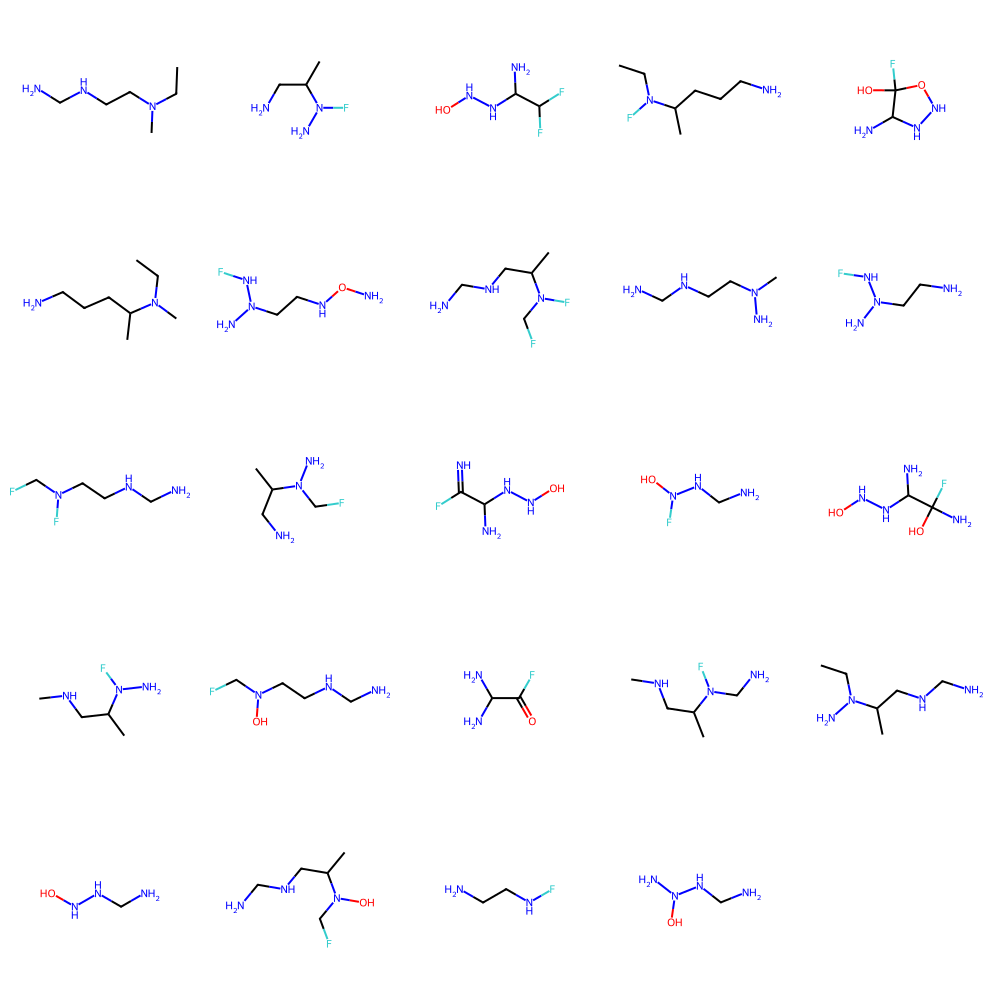

In [25]:
img = Draw.MolsToGridImage(
    generated_smiles_viz,
    molsPerRow=5,
    subImgSize=(200, 200),
    returnPNG=False
)

img